<a href="https://colab.research.google.com/github/Dinoelfantastico/Complejidad-Algoritmica/blob/main/Dijkstra_versi%C3%B3n_networkx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
!git clone https://github.com/Dinoelfantastico/librarys.git 2>/dev/null

In [62]:
from librarys.Carpeta import graphstuff as gs
import networkx as nx
from heapq import heappush as push, heappop as pop
import math

In [63]:
%%file 1.csv
0,1,4
0,2,7
0,5,3
1,4,1
1,2,3
2,4,1
2,3,1
4,3,4
5,4,3

Overwriting 1.csv


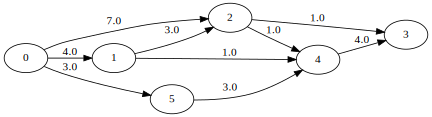

In [64]:
G = nx.read_weighted_edgelist('1.csv',create_using=nx.DiGraph,delimiter=',',nodetype=int)
gs.nx2gv(G,weighted=True)

In [65]:
def dijkstra(G,S):
  for u in G.nodes:
    G.nodes[u]['visited'] = False
    G.nodes[u]['cost'] = math.inf
    G.nodes[u]['path'] = -1

  G.nodes[S]['cost'] = 0
  Cola = [(0,S)]
  while Cola:
    g_u,u = pop(Cola)
    if not G.nodes[u]['visited']:
      G.nodes[u]['visited'] = True
      for v in G.neighbors(u):
        if not G.nodes[v]['visited']:
          w_uv = G.edges[u,v]['weight']
          f_uv = g_u+w_uv
          g_v = G.nodes[v]['cost']
          if f_uv<g_v:
            G.nodes[v]['cost'] = f_uv
            G.nodes[v]['path'] = u
            push(Cola,(f_uv,v))

  path = [-1]*G.number_of_nodes()
  for u,info in G.nodes.data():
    path[u] = info['path']
  
  return path

[-1, 0, 0, 2, 1, 0]


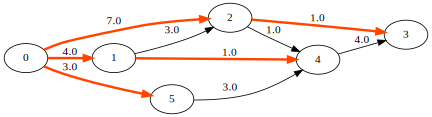

In [66]:
path = dijkstra(G,0)
print(path)
gs.nx2gv(G,weighted=True,path=path)

In [67]:
a,b = nx.single_source_dijkstra(G,0)
print("Del nodo 0 hacia todos los nodos (camino mínimo)")
s = 0
for i in a:
  if i!=0:
    s+=a[i]
    print(f"camino {b[i]} y su costo total es -> {a[i]}")

print("Total -> ",s)

Del nodo 0 hacia todos los nodos (camino mínimo)
camino [0, 5] y su costo total es -> 3.0
camino [0, 1] y su costo total es -> 4.0
camino [0, 1, 4] y su costo total es -> 5.0
camino [0, 2] y su costo total es -> 7.0
camino [0, 2, 3] y su costo total es -> 8.0
Total ->  27.0
